## Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Missing value def :
    Missing data, or missing values, occur when you don’t have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

why its is important :
    The concept of missing values is important to understand in order to successfully manage data.
    If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data.
    You can not generalize the result outside your reasearch as you are not handled the missing data properly and we can say you have unrepresntative sample which cause biased result.
 
Type of missing data :

1) Missing completely at random :MCAR 
            if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.
            
2) Missing at Random MAR:
            Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself.
            e.g If you are participating on survey and to fillout some question's answer is depend on other factors not depend on missing data like on survey female not like to desclose their age so we can observe the data missing at age are mostly the female than male ..its not depend on missing value.

3) Missing data not at random (MNAR) :
             It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

      For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured
    
algorithms that are not affected by missing values:

1) Histogram based Gradient-boosting Classifier / Regressor

2) k-NN algorithm can ignore a column from a distance measure when a value is missing.

3) k-NN and Random Forest algorithms but scikit-learn library implementation of k-NN and RandomForest does not support the    presence of the missing values
4) XGBoost supports
5) Lasso, KNeighbors, Random Forest, and Gradient Boosted Trees regressors

## Q2: List down techniques used to handle missing data. Give an example of each with python code.

How To Handle Missing Value?

1) Deleting the missing Value:

    1) Deleting Entire row
    
    2) Deleting Entire column
    
    
2) Imputing the missing Value:
    
    1. Replacing With Arbitrary Value:(Random sampling Imputation)
    2. Replacing With Mean:(Mean Value Imputation)
    3. Replacing With Median: (Median Value Imputation) If we have outliers in the dataset.
    4. Replacing With Mode:Categorical values
    5. Replacing with previous value – Forward fill
    6. Replacing with previous value – backword fill
    
3) Interpolation:
    1. Impute the Most Frequent Value
    2. Impute the Value “Missing”

4) Impute Missing Values Using Sci-kit Learn Library:
    1. Univariate Approach
    2. MultiVariate Approach
        a) IterativeImputer classes 
        b) Using KNNImputer 

5) Imputation using Deep Learning Library — Datawig

Analyze each column with missing values carefully to understand the reasons behind the missing values as it is crucial to find out the strategy for handling the missing values.

There are 2 primary ways of handling missing values:

## 1. Deleting the Missing values
## 2. Imputing the Missing Values



### 1. Deleting the Missing value:

⦁	Generally, this approach is not recommended. It is one of the quick and dirty techniques one can use to deal with missing values.

⦁	If the missing value is of the type Missing Not At Random (MNAR), then it should not be deleted.

⦁	If the missing value is of type Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted.

⦁	The disadvantage of this method is one might end up deleting some useful data from the dataset.

There are 2 ways one can delete the missing values:

#### 1.Deleting the entire row:

⦁	If a row has many missing values, then you can choose to drop the entire row.
⦁	If every row has some (column) value missing then you might end up deleting the whole data.

#### 2.Deleting the entire column:

⦁	If a certain column has many missing values, then you can choose to drop the entire column.


In [3]:
import seaborn as sns

In [82]:
df=sns.load_dataset('titanic')

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
## Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
## Delete the rows or data point to handle missing values
df.dropna().shape
#print(df)

(182, 15)

In [ ]:
## Column wise deletion
df.dropna(axis=1)

### 2.Imputing the Missing Value

There are different ways of replacing the missing values.

You can use the python libraries Pandas and Sci-kit learn as follows:

#### 1.Replacing With Arbitrary Value:(Random sampling Imputation)

    If you can make an educated guess about the missing value then you can replace it with some arbitrary value using the following code.


In [37]:
df['age']=df['age'].fillna(45)

In [38]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 2. Replacing With Mean:(Mean Value Imputation)

    This is the most common method of imputing missing values of numeric columns. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.



<AxesSubplot:xlabel='age', ylabel='Count'>

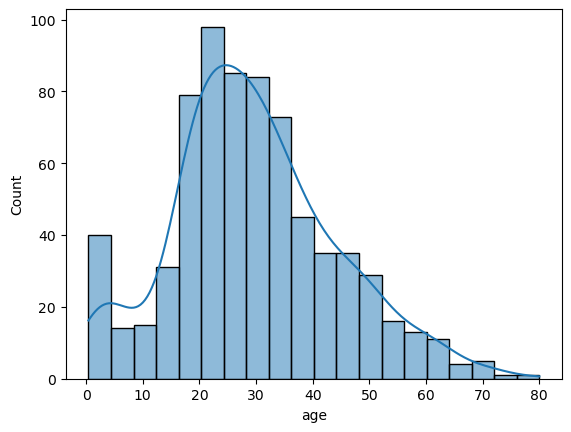

In [41]:
sns.histplot(df['age'],kde=True)

In [43]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [44]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


#### 3.Replacing With Median: (Median Value Imputation) If we have outliers in the dataset

Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

In [45]:
df['Age_median']=df['age'].fillna(df['age'].median())

In [46]:
df[['Age_median','age','Age_mean']]

,Age_median,age,Age_mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,28.0,NaN,29.699118
889,26.0,26.0,26.000000


#### 4.Replacing With Mode:Categorical values

    Mode is the most frequently occurring value. It is used in the case of categorical features.

In [47]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [48]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [53]:
df[df['embarked'].notna()]['embarked'].mode()

0    S
Name: embarked, dtype: object

In [56]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [60]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [61]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [63]:
df['embarked_mode'].isnull().sum()

0

In [64]:
df['embarked'].isnull().sum()

2

#### 5.. Replacing with previous value – Forward fill:

    In some cases, imputing the values with the previous value instead of mean, mode or median is more appropriate. This is called forward fill. It is mostly used in time series data.You can use ‘fillna’ function with the parameter ‘method = ffill’
    

In [66]:
df['embarked_mode_ffill'] = df['embarked'].ffill()

In [69]:
df['embarked_mode_ffill'].isnull().sum()

0

In [70]:
df[['embarked_mode_ffill','embarked']]

,embarked_mode_ffill,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


#### 6. Replacing with next value – Backward fill:

In backward fill, the missing value is imputed using the next value.


In [83]:
df['embarked_mode_bfill'] = df['embarked'].bfill()

In [80]:
df=df.fillna(method='bfill')

In [81]:
df.isnull().sum()

survived               0
pclass                 0
sex                    0
age                    0
sibsp                  0
parch                  0
fare                   0
embarked               0
class                  0
who                    0
adult_male             0
deck                   1
embark_town            0
alive                  0
alone                  0
embarked_mode_bfill    0
dtype: int64

In [84]:
##for specific column
df['embarked_mode_bfill'].isnull().sum()

0

In [ ]:
test.interpolate()

### 3. Interpolation:

    Missing values can also be imputed using interpolation. Pandas interpolate method can be used to replace the missing values with different interpolation methods like ‘polynomial’, ‘linear’, ‘quadratic’. Default method is ‘linear’.
    
Imputing Missing Values For Categorical Features:

There are two ways to impute missing values for categorical features as follows:

**Impute the Most Frequent Value

**Impute the Value “Missing”



##### 1. Impute the Most Frequent Value:
     We will use ‘SimpleImputer’ in this case, and as this is a non-numeric column, we can’t use mean or median, but we can use the most frequent value and constant

In [86]:
#Exaple
import pandas as pd
import numpy as np
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})


In [87]:
X

,Shape
0,square
1,square
2,oval
3,circle
4,NaN


In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['square']], dtype=object)

##### 2. Impute the Value “Missing

We can impute the value “missing,” which treats it as a separate category.


In [90]:
#Exaple
import pandas as pd
import numpy as np
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})

In [91]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['missing']], dtype=object)

### 4. Impute Missing Values Using Sci-kit Learn Library

**Regression Imputation**:

We can impute missing values using the sci-kit library by creating a model to predict the observed value of a variable based on another variable which is known as regression imputation.

#### 1 .Univariate Approach:
        In a Univariate approach, only a single feature is taken into consideration. You can use the class SimpleImputer and replace the missing values with mean, mode, median, or some constant value.

In [93]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer()

In [94]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


#### 2.Multivariate Approach:
        In a multivariate approach, more than one feature is taken into consideration. There are two ways to impute missing values considering the multivariate approach. 
        
        a)IterativeImputer classes 
        b)Using KNNImputer 

**IterativeImputer classes** 

In [95]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

IterativeImputer as follows: For all rows in which ‘Age’ is not missing, sci-kit learn runs a regression model. It uses ‘Sib sp’ and ‘Fare’ as the features and ‘Age’ as the target. And then, for all rows for which ‘Age’ is missing, it makes predictions for ‘Age’ by passing ‘Sib sp’ and ‘Fare’ to the training model. So it actually builds a regression model with two features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

**Nearest Neighbors Imputations (KNNImputer)**

Missing values are imputed using the k-Nearest Neighbors approach, where a Euclidean distance is used to find the nearest neighbors. Let’s take the above example of the titanic dataset to see how it works.

In [98]:
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [99]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

## Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Def:
        Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.  
        Example :
            100 records only 5 patients are diagnosed with the disease. So, the majority class is 95% with no disease and the minority class is only 5% with the disease. 
         
**What will happen if imbalanced data is not handled?**

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction.
    Here model fails to identify the minority class yet the accuracy score of the model will be 95%.

## Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

This technique is used to upsample or downsample the minority or majority class.

Up Samlpling:

When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling./Up Sampling.

Down Sampling :

Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling./down sampling

After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

Example When it required :

    Let’s assume that XYZ is a bank that issues a credit card to its customers. Now the bank is concerned that some fraudulent transactions are going on and when the bank checks their data they found that for each 2000 transaction there are only 30 Nos of fraud recorded. So, the number of fraud per 100 transactions is less than 2%, or we can say more than 98% transaction is “No Fraud” in nature. Here, the class “No Fraud” is called the majority class, and the much smaller in size “Fraud” class is called the minority class.
    If we train the model with this data then model will biased toward the majority class and result will be incorrect prediction.So to make model unbiased toward both the classes we need same size of data so model will give eqaul importance to both the data

The classification data set with skewed class proportions is called an imbalanced data set. Classes that make up a large proportion of the data sets are called majority classes. That makeup smaller proportions are
minority classes.

Degree of imbalance Proportion of Minority Class

1>> Mild 20-40% of the data set
2>> Moderate 1-20% of the data set
3>> Extreme <1% of the data set

If we have an imbalanced data set, first try training on the true distribution.
If the model works well and generalizes, you are done! If not, try the following up sampling and down sampling technique.

1. Up-sampling:
    
Upsampling is the process of randomly duplicating observations from the minority class to reinforce its signal.

First, we will import the resampling module from Scikit-Learn:

Module for resampling Python
1- From sklearn.utils import resample

Next, we will create a new Data Frame with an up-sampled minority class. Here are the steps:
1- First, we will separate observations from each class into different Data Frames.
2- Next, we will resample the minority class with replacement, setting the number of samples to match that of the majority class.
3- Finally, we'll combine the up-sampled minority class Data Frame with the original majority class Data Frame.



2-Down-sampling
Downsampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The process is similar to that of sampling. Here are the steps:

1-First, we will separate observations from each class into different Data Frames.
2-Next, we will resample the majority class without replacement, setting the a number of samples to match that of the minority class.
3-Finally, we will combine the down-sampled majority class Data Frame with the original minority class Data Frame.

## Q5: What is data Augmentation? Explain SMOTE.

What is data augmentation?

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.

Why Augmentation required :

1) D ata augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.
2) For machine learning models, collecting and labeling data can be exhausting and costly processes. Transformations in datasets by using data augmentation techniques allow companies to reduce these operational costs.

3) One of the steps in a data model is cleaning data which is necessary for high-accuracy models. However, if cleaning reduces the representability of data, then the model cannot provide good predictions for real-world inputs. Data augmentation techniques can enable machine learning models to be more robust by creating variations that the model may see in the real world.

#### SMOTE(Synthetic Minority Oversampling Technique):

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points.
SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. 
The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.Here by SMOTH we are joining two data points and creating data in between those data pints so unlike the upsampling we are not creating data points at same place so varience will be there.

The SMOTE algorithm works as follows:

1) You draw a random sample from the minority class.

2) For the observations in this sample, you will identify the k nearest neighbors.

3) You will then take one of those neighbors and identify the vector between the current data point and the selected neighbor.

4) You multiply the vector by a random number between 0 and 1.

5) To obtain the synthetic data point, you add this to the current data point.

6) This operation is actually very much like slightly moving the data point in the direction of its neighbor. 

This way, you make sure that your synthetic data point is not an exact copy of an existing data point while making sure that it is also not too different from the known observations in your minority class.

## Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Def1:

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 

Def 2:
    Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset

**Why is it essential to handle outliers:** 

    1)It causes varius problem during our statistical analysis.Like it can have significant impact on mean and std deviation.
    2)Statastical mean and varience are very sensetive to the outliers.
    3)In addtion,many machine models are very sensetive to the outliers.which may decrease thier performance.


## Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

In [ ]:
1.we can get all data in Datavframe and run below query .

    df.isnull().sum()
    
2) Here check missing values.
3)Sometimes value having NA,Nan such type values in catogorical data type so in the database so we can check the count by executing below query.

        df['column name'].unique()
    
    By above query we can all unique values that are in that columns with the unnecessary values which should not be there.
    
4)If the data is two large and missing values are <5% of data then we can delete those values by row .
    If the data is too large and the values that are missing in the specific column which is not be beneficial for prediction
    of the model then we can ingore or delete that column by discussing with the engineering team .
    If that data is not required for model bulding we can take necessary action.
5) Imputation method can use to fill up the missing value if the values missing data is nnecessary for prediction of the daaset.
    as well as if data is not large then dropping the column and deleting the row is not an good idea as we can loose the data by this
6) Check the values type like wheather its contineous ,discrete or catogorical and according to  that we can apply the missing value technique.
7)in question 2 decsribe the techniques in details

## Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

We can compare the mean likelihood to recommend for the 1’s and 0’s (missing and non-missing). If there IS a significant difference in means, we have evidence that the data is NOT missing at random.  In other words, there’s a pattern to the non-responses.
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself.
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.
We can do the survey wrt to missing value data and other variable in the data set and find out the if there is any relation between other variable with missingness of the variable or its the case os MNAR.


## Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do.
There are some strategies evaluate the performance of your machine learning model on this imbalanced dataset.

1) Up sampling

2) Down sampling

But we preffer up sampling as we dont want to loose the data and want correct and unbiased prediction,


## Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

1) Random Under-Sampling:
    
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

2) Random Under-Sampling With Imblearn:

You may have heard about pandas, numpy, matplotlib, etc. while learning data science. But there is another library: imblearn, which is used to sample imbalanced datasets and improve your model performance.

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

3) NearMiss:
 
NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance will make the majority class equal to the minority class.

## Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

1) Random Over-Sampling:
     
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

2) Random Over-Sampling With imblearn:

One way to fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples. The RandomOverSampler offers such a scheme.

3) Synthetic Minority Oversampling Technique (SMOTE):

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
